In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("mushroom.csv")

In [3]:
df.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [4]:
df.tail()

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population habitat  \
1995     orange         one     flaring            purple   abundant  leaves   
1996      white         one        zone            yellow   numerous   waste   
1997      brown         two  evanescent            yellow   abundant   woods   
1998     yellow         one    cobwebby             brown   solitary   woods   
1999      white         two       large             white   numerous   urban   

          class stalk_height cap_diameter  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[5 rows x 26 columns]

In [5]:
df.shape

(2000, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [7]:
df.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [8]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(976, 26)

In [11]:
df.columns.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

Unnamed: 0  stalk_height  cap_diameter
count   976.000000    976.000000    976.000000
mean    633.275615      8.524684     12.598566
std     372.262936      3.703043      6.987077
min       0.000000      2.000000      1.000000
25%     306.750000      5.326820      6.141161
50%     622.500000      8.367245     12.626094
75%     959.250000     11.758624     18.559780
max    1279.000000     15.095066     25.000054

In [13]:
df['class'].value_counts()

class
poisonous    618
edible       358
Name: count, dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'stalk_height'}>],
       [<Axes: title={'center': 'cap_diameter'}>, <Axes: >]], dtype=object)

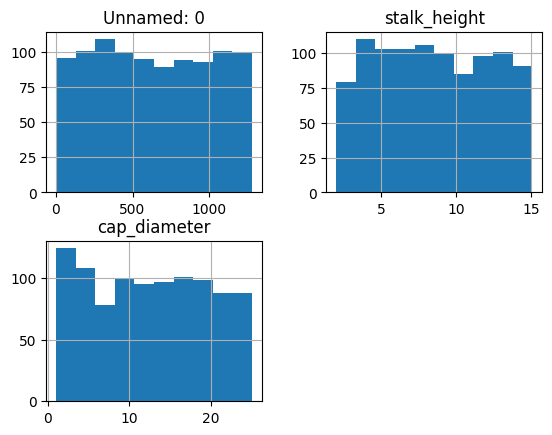

In [14]:
df.hist()

In [15]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [16]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
df.head()

cap_shape cap_surface cap_color bruises   odor gill_attachment gill_spacing  \
0    sunken       scaly     white      no  anise      descending      distant   
1    sunken     fibrous       red      no  anise         notched      crowded   
2      flat     grooves    purple     yes   foul      descending      crowded   
3      bell       scaly      pink     yes  fishy         notched        close   
4      flat      smooth    yellow     yes  musty            free      crowded   

  gill_size gill_color stalk_shape  ...  veil_type veil_color ring_number  \
0     broad       pink    tapering  ...    partial      brown         two   
1    narrow  chocolate   enlarging  ...  universal      brown         two   
2     broad     purple    tapering  ...  universal     yellow         two   
3     broad     orange   enlarging  ...    partial     yellow         two   
4    narrow     orange   enlarging  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 25 columns]

In [18]:
df.dtypes

cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

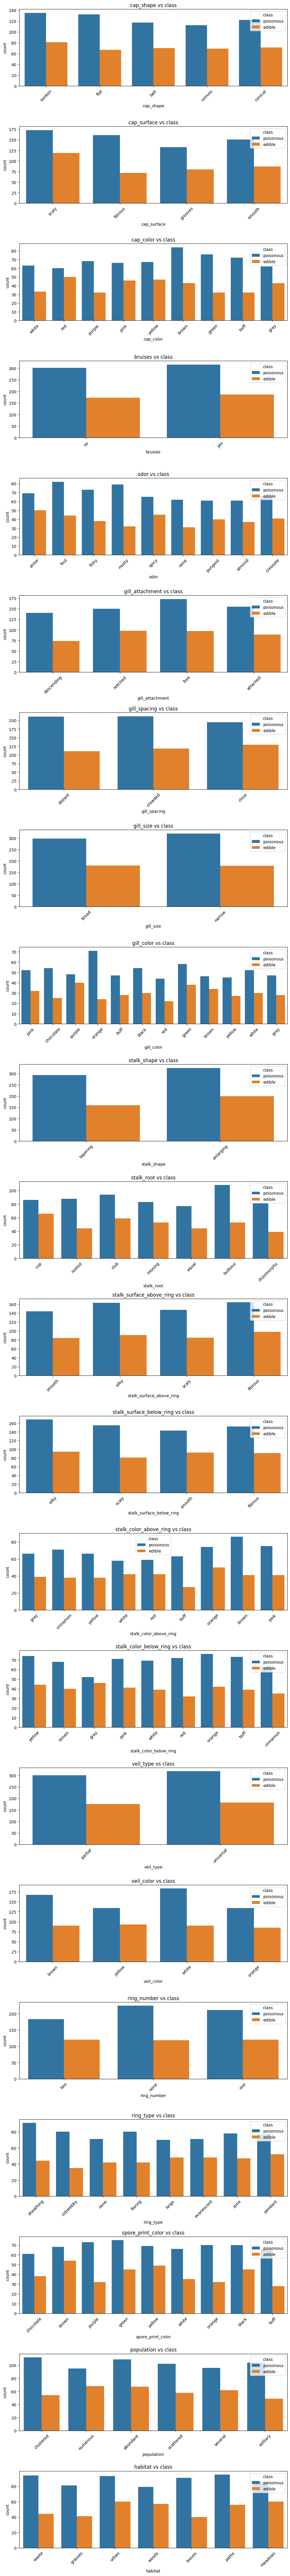

In [19]:
#catagorical features vs target 
features = [col for col in df.columns if df[col].dtype=='object' and col!='class']
fig, axes = plt.subplots(len(features), 1, figsize=(10, 4*len(features)))

for i, col in enumerate(features):
    sns.countplot(x=col, hue='class', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs class')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import chi2_contingency
import pandas as pd
results = []
for col in features:
    contingency = pd.crosstab(df[col], df['class'])  # no encoding needed
    chi2, p, dof, expected = chi2_contingency(contingency)
    results.append((col, chi2, p))
# Print nicely
for col, chi2, p in results:
    print(f"{col}: chi2={chi2:.2f}, p={p:.5f}")

cap_shape: chi2=1.05, p=0.90240
cap_surface: chi2=5.51, p=0.13813
cap_color: chi2=11.89, p=0.15615
bruises: chi2=0.03, p=0.85608
odor: chi2=6.70, p=0.56947
gill_attachment: chi2=1.34, p=0.72062
gill_spacing: chi2=2.17, p=0.33830
gill_size: chi2=0.31, p=0.57973
gill_color: chi2=11.10, p=0.43501
stalk_shape: chi2=0.70, p=0.40175
stalk_root: chi2=6.17, p=0.40468
stalk_surface_above_ring: chi2=0.14, p=0.98642
stalk_surface_below_ring: chi2=1.32, p=0.72531
stalk_color_above_ring: chi2=6.01, p=0.64571
stalk_color_below_ring: chi2=6.31, p=0.61244
veil_type: chi2=0.01, p=0.90464
veil_color: chi2=4.15, p=0.24546
ring_number: chi2=1.84, p=0.39869
ring_type: chi2=5.46, p=0.60461
spore_print_color: chi2=9.75, p=0.28324
population: chi2=5.04, p=0.41059
habitat: chi2=7.41, p=0.28469


In [21]:
LE=LabelEncoder()
for col in features:
    df[col]=LE.fit_transform(df[col])
df['class']=LE.fit_transform(df['class'])

In [22]:
df.head()

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          4            2          7        0     1                1   
1          4            0          6        0     1                3   
2          3            1          5        1     4                1   
3          0            2          4        1     3                3   
4          3            3          8        1     5                2   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0             2          0           7            1  ...          0   
1             1          1           3            0  ...          1   
2             1          0           8            1  ...          1   
3             0          0           6            0  ...          0   
4             1          1           6            0  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3           1        5   
1           0            2          6                  1           2        5   
2           3            2          6                  6           0        5   
3           3            2          0                  4           1        0   
4           2            0          4                  8           1        4   

   class  stalk_height  cap_diameter  
0      1     14.276173      5.054983  
1      0      3.952715     19.068319  
2      1      9.054265      7.205884  
3      1      5.226499     20.932692  
4      1     14.037532     12.545245  

[5 rows x 25 columns]

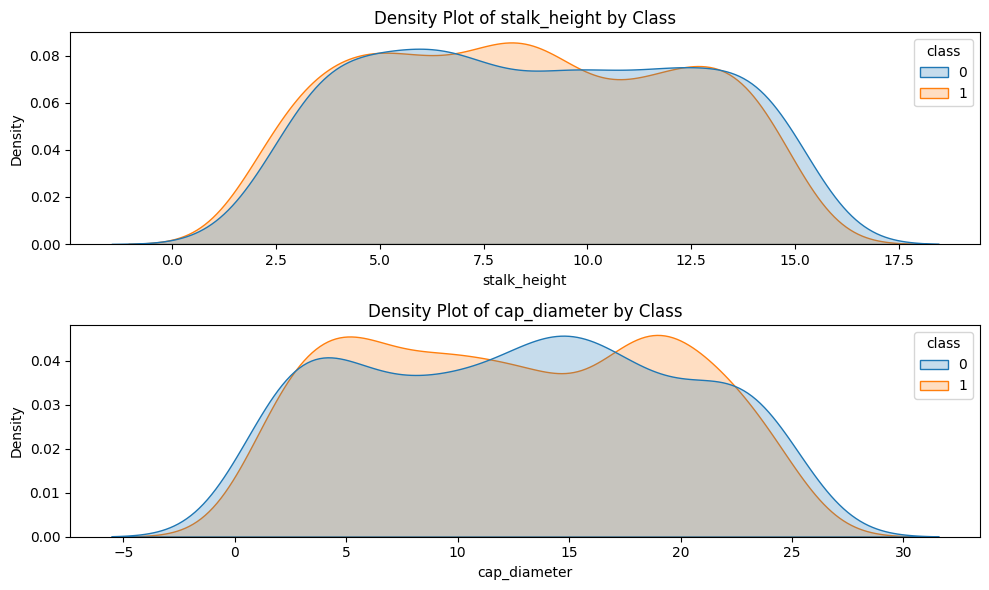

In [23]:
# Numeric features only
num_features = ['stalk_height', 'cap_diameter']
fig, axes = plt.subplots(len(num_features), 1, figsize=(10, 6))
for i, col in enumerate(num_features):
    sns.kdeplot(data=df, x=col, hue='class', fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(f'Density Plot of {col} by Class')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x18602951e50>,
 'caps': [<matplotlib.lines.Line2D at 0x186029520d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18602951d10>],
 'medians': [<matplotlib.lines.Line2D at 0x18602952350>],
 'fliers': [<matplotlib.lines.Line2D at 0x18602952490>],
 'means': []}

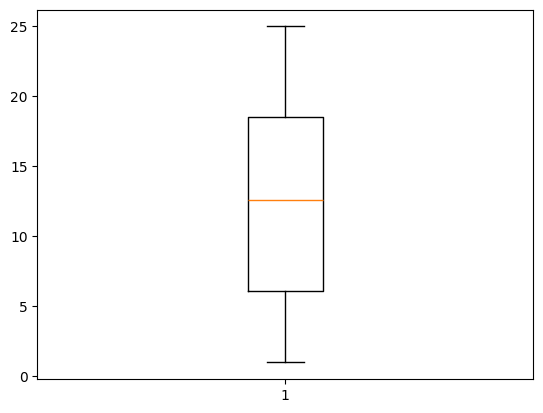

In [24]:
plt.boxplot(df['cap_diameter'])

{'whiskers': [<matplotlib.lines.Line2D at 0x186029b8f50>,
 'caps': [<matplotlib.lines.Line2D at 0x186029b91d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x186029b8e10>],
 'medians': [<matplotlib.lines.Line2D at 0x186029b9450>],
 'fliers': [<matplotlib.lines.Line2D at 0x186029b9590>],
 'means': []}

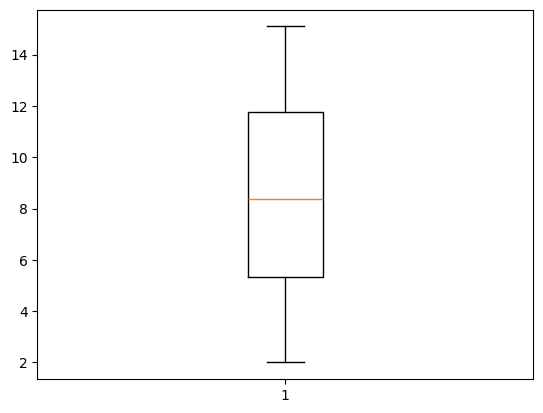

In [25]:
plt.boxplot(df['stalk_height'])

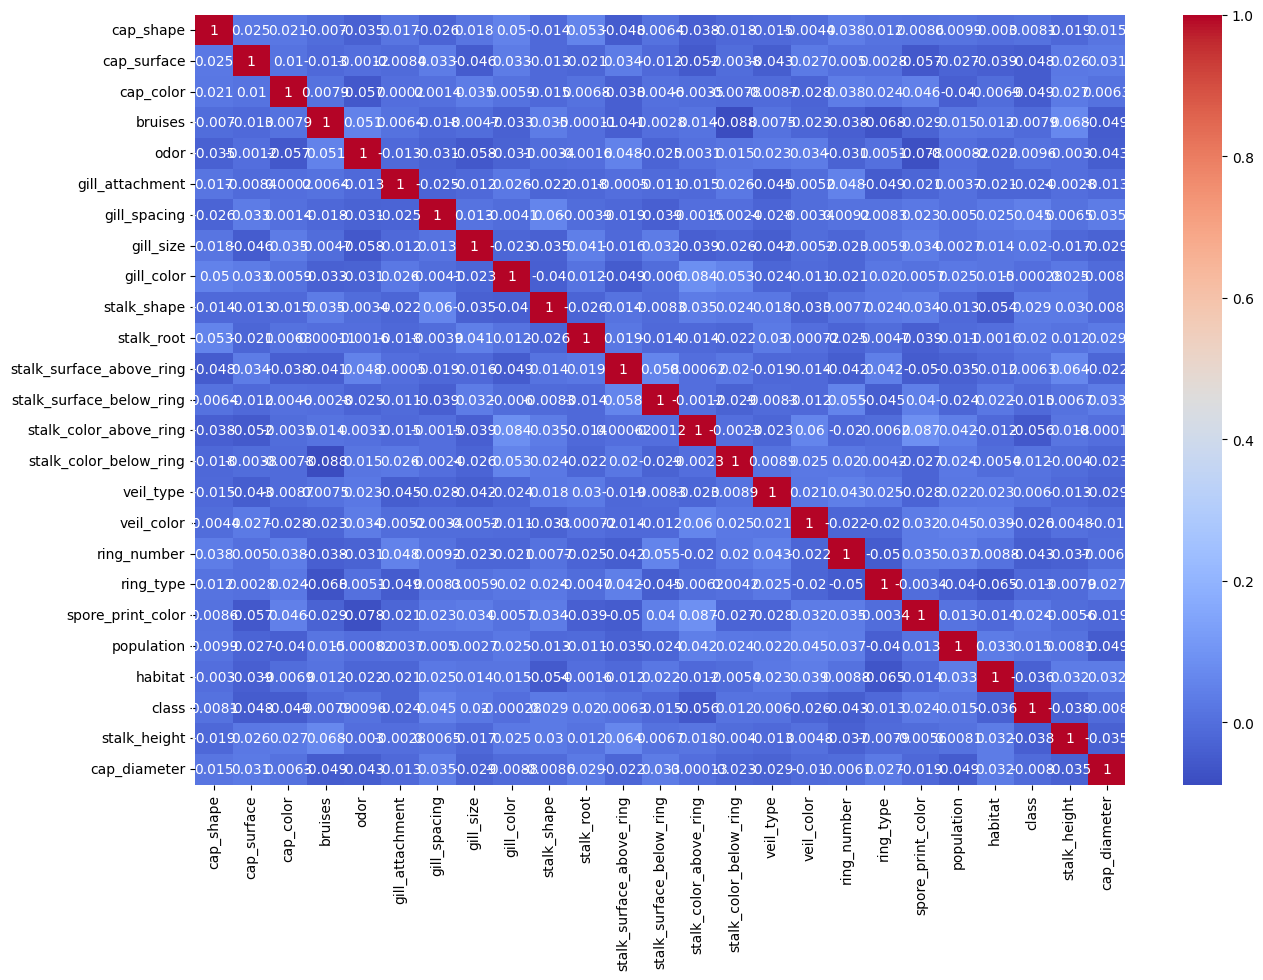

In [26]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [27]:
X=df.drop('class',axis=1)
y=df['class']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [29]:
X_train.shape

(780, 24)

In [30]:
X_test.shape

(196, 24)

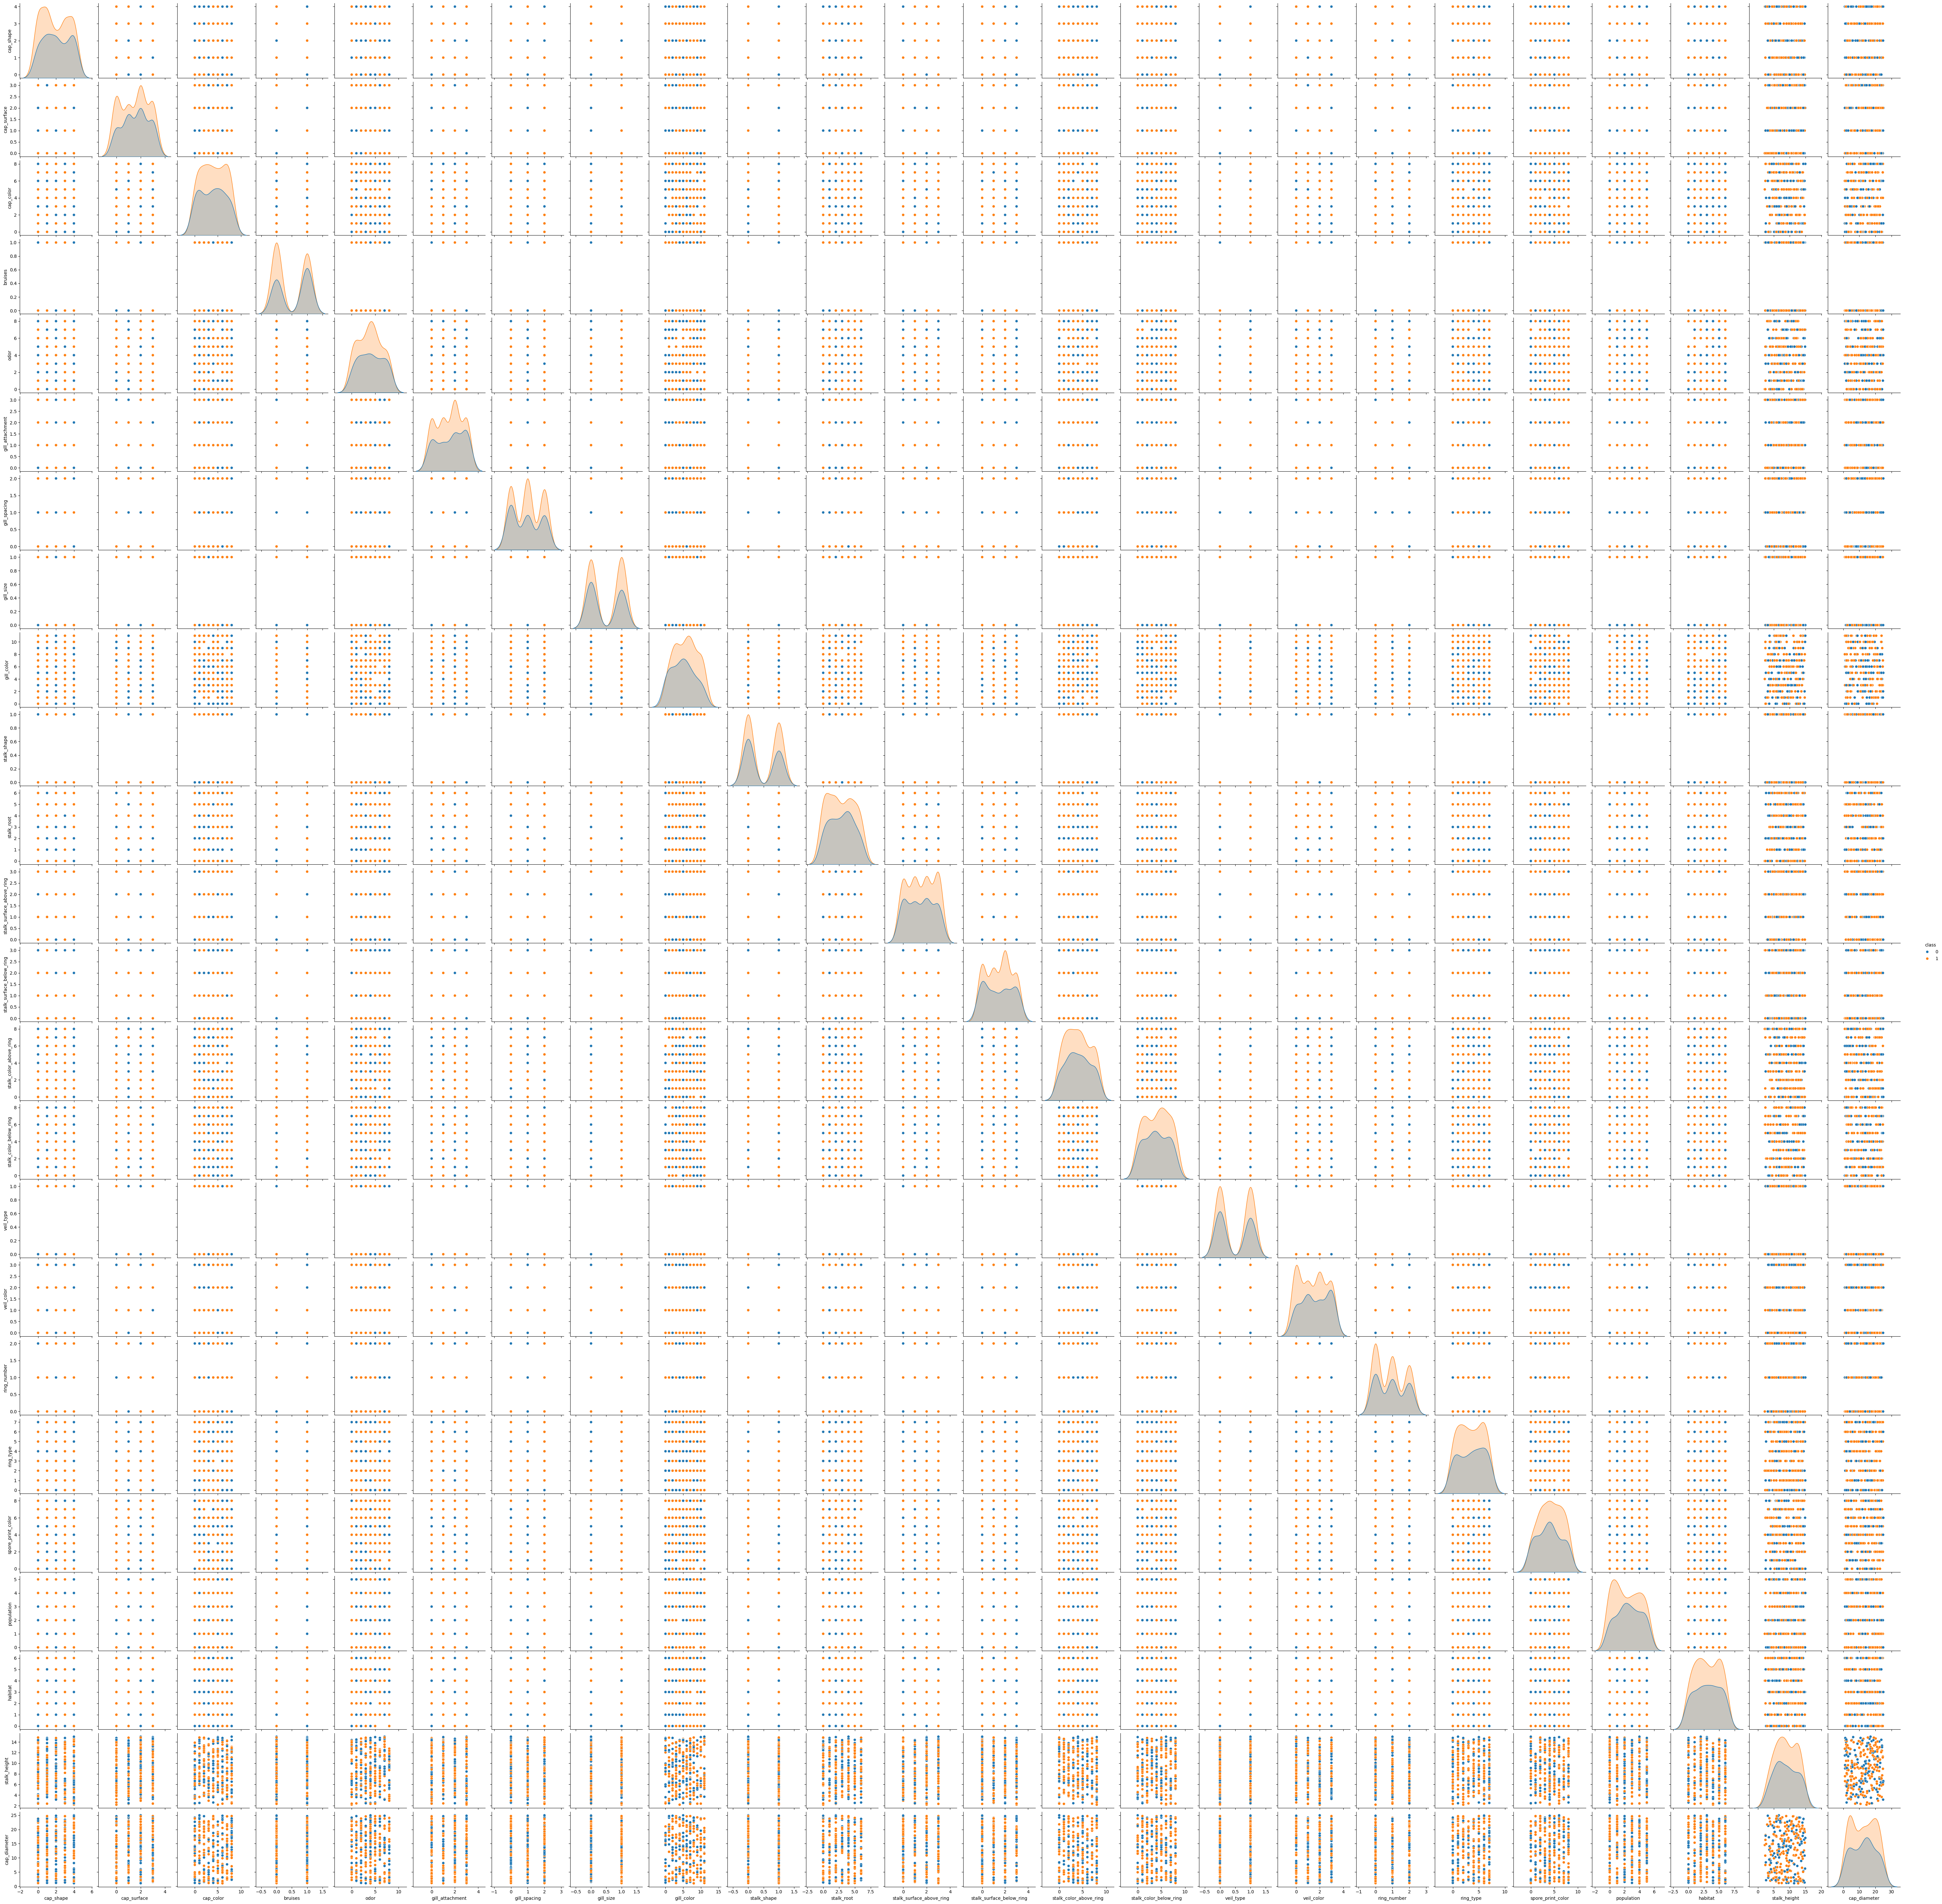

In [31]:
# Pairplot on sample (to avoid large size)
sns.pairplot(df.sample(300), hue='class')
plt.show()

In [32]:
svm_model=SVC(kernel='rbf')

In [33]:
svm_model.fit(X_train,y_train)


SVC()

In [34]:
y_pred=svm_model.predict(X_test)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6275510204081632
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.63      1.00      0.77       123

    accuracy                           0.63       196
   macro avg       0.31      0.50      0.39       196
weighted avg       0.39      0.63      0.48       196

Confusion Matrix:
 [[  0  73]
 [  0 123]]


In [36]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best Score: 0.6346153846153846


In [37]:
# Compare kernels
for kernel in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, preds)}")


Kernel: linear, Accuracy: 0.6275510204081632
Kernel: poly, Accuracy: 0.6377551020408163
Kernel: rbf, Accuracy: 0.6275510204081632


In [38]:
from sklearn.decomposition import PCA
# Reduce features to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [39]:
X_test_pca 

array([[ 8.59496470e+00, -5.06980976e+00],
       [-5.16059366e+00, -3.59054938e+00],
       [ 4.16583171e+00,  7.54428948e+00],
       [ 1.12745121e+01,  2.73254082e+00],
       [ 8.17413645e+00, -5.66445393e+00],
       [ 1.72453854e+00, -2.95878312e+00],
       [-2.99843696e+00,  5.93703100e+00],
       [-7.27179675e+00, -3.77565024e-01],
       [-9.24636770e+00, -7.06049980e+00],
       [ 1.07850367e+01, -3.44758642e+00],
       [ 2.92786804e+00,  2.72811662e+00],
       [ 5.74627005e+00, -3.93615515e+00],
       [-1.09724366e+01, -2.88899475e+00],
       [ 1.12069745e+00, -1.24911911e+00],
       [-2.68505028e+00,  2.00156770e+00],
       [-8.21397751e+00, -5.17823165e+00],
       [-1.40369116e+00,  4.95229707e+00],
       [-7.41685233e+00,  2.14294038e+00],
       [-1.30557391e+00,  1.21711752e+00],
       [ 4.80262325e+00,  3.18676640e+00],
       [ 8.77009355e+00, -2.25486743e+00],
       [-7.83184703e+00, -2.19653965e+00],
       [ 5.30264620e+00,  2.63650727e+00],
       [ 5.

In [40]:
# Train SVM on reduced data
svm_pca = SVC(kernel='rbf')
svm_pca.fit(X_train_pca, y_train)


SVC()

In [41]:
X_train_pca, y_train

(array([[ 7.1700315 ,  2.3727685 ],
        [-0.15275274,  5.6982273 ],
        [-0.10702645, -2.30824144],
        ...,
        [ 6.74244487,  2.96868744],
        [ 4.1054943 , -0.1361189 ],
        [-8.84554919,  1.69262247]], shape=(780, 2)),
 1069    0
 1442    1
 1539    0
 1032    1
 1627    1
        ..
 545     1
 179     1
 7       1
 241     1
 376     0
 Name: class, Length: 780, dtype: int64)

In [42]:
# Plot decision boundary
x_min, x_max = X_test_pca[:,0].min()-1, X_test_pca[:,0].max()+1
y_min, y_max = X_test_pca[:,1].min()-1, X_test_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))


In [43]:
#Predict class for each grid point
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


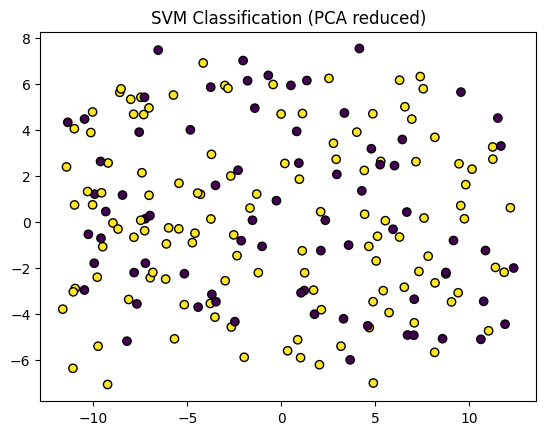

In [44]:
#Plotting the decision boundary
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, edgecolors='k')
plt.title("SVM Classification (PCA reduced)")
plt.show()